# Plotting Joint Angles from IMU Data using OpenSim

This notebook generates `.svg` and `.pdf` plots of joint angles estimated through inverse kinematics using **OpenSim**. The joint angles are stored as `.mot` files in the VIDIMU dataset.

- Input: `.mot` files from OpenSim
- Output: Formatted joint angle plots for each activity and subject
- Data source: VIDIMU dataset


In [ ]:
import os
import sys
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import math

# Add parent project directory to the Python path to allow local imports
sys.path.append(os.path.dirname(os.getcwd()))

# Import custom plotting function for joint angles
from utils.plotUtilities import plotMotJointAnglesPerActivity



In [2]:
# Set the root path to the dataset location
fulldatasetpath = r"D:\Machine Learning\Video_IMU data\Data"


In [3]:

# Define input and output subdirectories
inpath = os.path.join(fulldatasetpath, 'dataset', 'videoandimus')
outpath = os.path.join(fulldatasetpath,'analysis','videoandimus','iangles')

Select activities

In [4]:
# Select activities of interest from the VIDIMU dataset

# Lower-body focused activities
lower_activities = ["A01","A02","A03","A04"]

# Upper-body focused activities
upper_activities = ["A05","A06","A07","A08","A09","A10","A11","A12","A13"]

# Combined list of all activities
dataset_activities = lower_activities + upper_activities

# Human-readable labels for each activity
activities_legend = ["walk_forward", "walk_backward", "walk_along","sit_to_stand",
"move_right_arm","move_left_arm","drink_right_arm","drink_left_arm", "assemble_both_arms","throw_both_arms",
"reachup_right_arm","reachup_left_arm","tear_both_arms"]

### 1. From 'dataset/videandimus' to 'analysis/videoandimus/iangles'

In [5]:

# List of subject IDs available in the VIDIMU dataset
subjects = ["S40","S41","S42",  "S44",  "S46","S47","S48","S49","S50",
            "S51","S52","S53","S54","S55","S56","S57"]

In [6]:
# Select representative joint angle signals from .mot files for visualisation and error detection 

# Lower body signals (e.g., hip, knee, ankle)
lowerbody_motsignals=['pelvis_tilt','pelvis_list','pelvis_rotation',
    #'pelvis_tx','pelvis_ty','pelvis_tz',
    'hip_flexion_r','hip_adduction_r',
    'hip_rotation_r',
    'knee_angle_r',	#'knee_angle_r_beta',	
    #'ankle_angle_r',	'subtalar_angle_r',	'mtp_angle_r',	
    'hip_flexion_l','hip_adduction_l',	
    'hip_rotation_l',
    'knee_angle_l',#'knee_angle_l_beta',	
    #'ankle_angle_l',	'subtalar_angle_l',	mtp_angle_l',	
    #'lumbar_extension',	'lumbar_bending',	'lumbar_rotation',\
    #'arm_flex_r',	'arm_add_r',	'arm_rot_r'#,	elbow_flex_r',	'pro_sup_r',	'wrist_flex_r',	'wrist_dev_r',	'arm_flex_l',	'arm_add_l',	'arm_rot_l',\
    #'elbow_flex_l',	'pro_sup_l',	wrist_flex_l',	wrist_dev_l'
    ]

# Upper body signals (e.g., shoulder, elbow, wrist)
upperbody_motsignals=[#'pelvis_tilt','pelvis_list','pelvis_rotation',
    #'pelvis_tx','pelvis_ty','pelvis_tz',
    #'hip_flexion_r','hip_adduction_r','hip_rotation_r',
    #'knee_angle_r','','',#'knee_angle_r_beta',	
    #'ankle_angle_r','subtalar_angle_r','mtp_angle_r',	
    #'hip_flexion_l','hip_adduction_l','hip_rotation_l',
    #'knee_angle_l','','',#	'knee_angle_l_beta',	
    #'ankle_angle_l','subtalar_angle_l','mtp_angle_l',	
    'lumbar_extension',	'lumbar_bending','lumbar_rotation',\
    'arm_flex_r','arm_add_r','arm_rot_r',
    'elbow_flex_r','pro_sup_r',
    #'wrist_flex_r',	'wrist_dev_r','',
    'arm_flex_l',#'arm_add_l','arm_rot_l',
    'elbow_flex_l','pro_sup_l',
    #'wrist_flex_l',	'wrist_dev_l',''
    ]

In [7]:
# Define angle display ranges for joint signals
# These ranges define the y-axis limits when plotting each joint signal

# Lower body joint angle limits (in degrees)
lowerbody_motsignals_range = {
    'pelvis_tilt':(-90,90),
    'pelvis_list':(-90,90),
    'pelvis_rotation':(-110,110),
    'hip_flexion_r':(-30,120),
    'hip_adduction_r':(-50,30),
    'hip_rotation_r':(-60,40),
    'knee_angle_r':(-20,120),
    'hip_flexion_l':(-30,120),
    'hip_adduction_l':(-50,30),
    'hip_rotation_l':(-60,40),
    'knee_angle_l':(-20,120)
}

# Upper body joint angle limits (in degrees)
upperbody_motsignals_range = {
    'lumbar_extension':(-90,90),
    'lumbar_bending':(-90,90),
    'lumbar_rotation':(-90,90),
    'arm_flex_r':(-90,180),
    'arm_add_r':(-180,90),
    'arm_rot_r':(-90,100),
    'elbow_flex_r':(-10,180),
    'pro_sup_r':(-10,180),
    'arm_flex_l':(-90,190),
    'arm_add_l':(-180,90),
    'arm_rot_l':(-90,100),
    'elbow_flex_l':(-10,190),
    'pro_sup_l':(-10,200),
}

Activity: A01 – File: ik_S41_A01_T02.mot


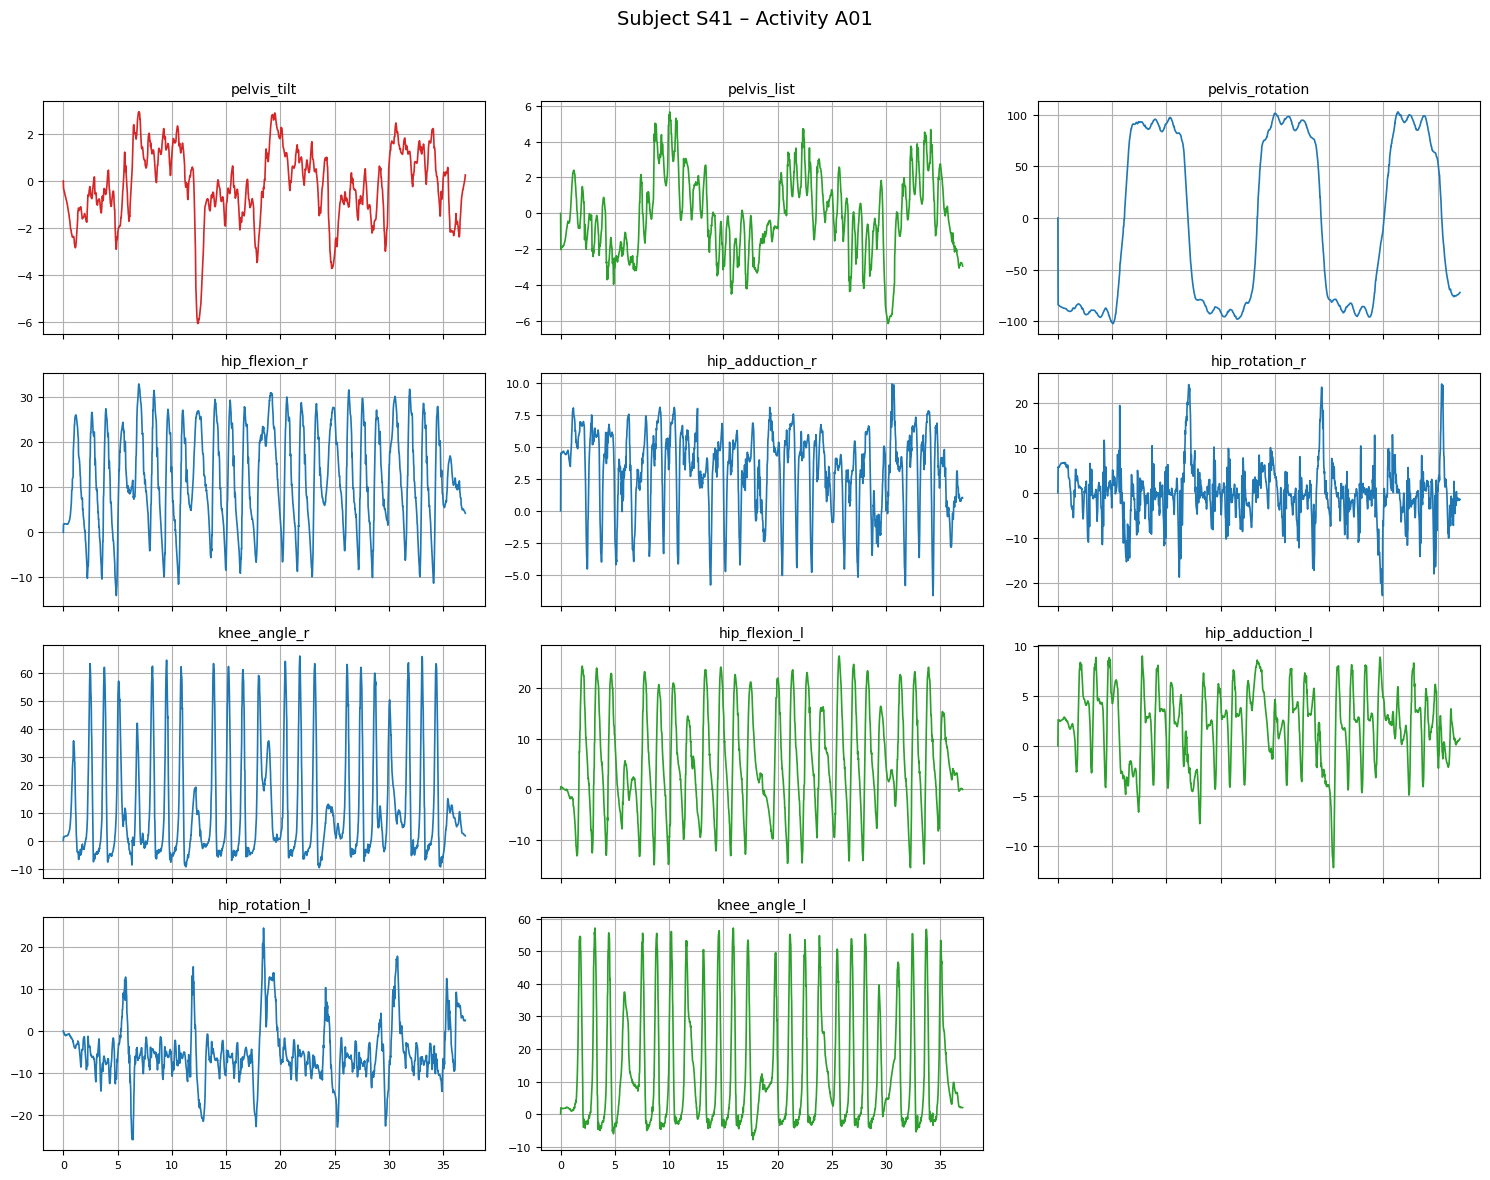

Activity: A03 – File: ik_S41_A03_T01.mot


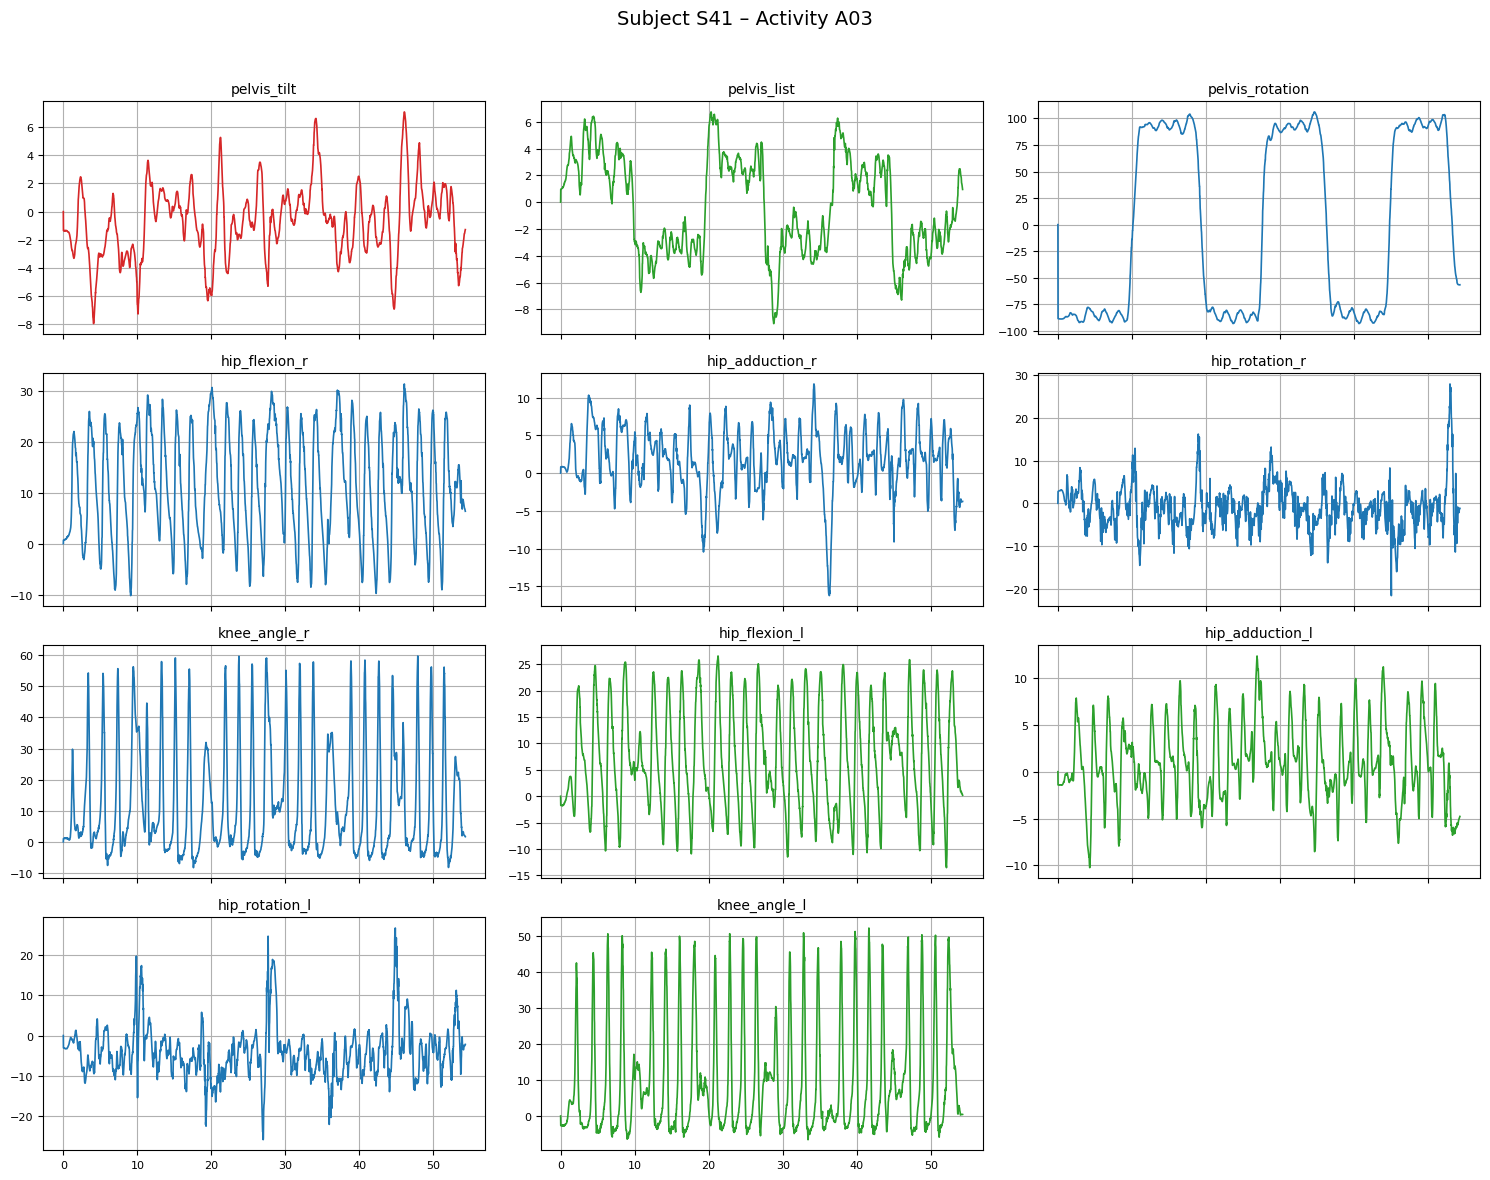

Activity: A07 – File: ik_S41_A07_T01.mot


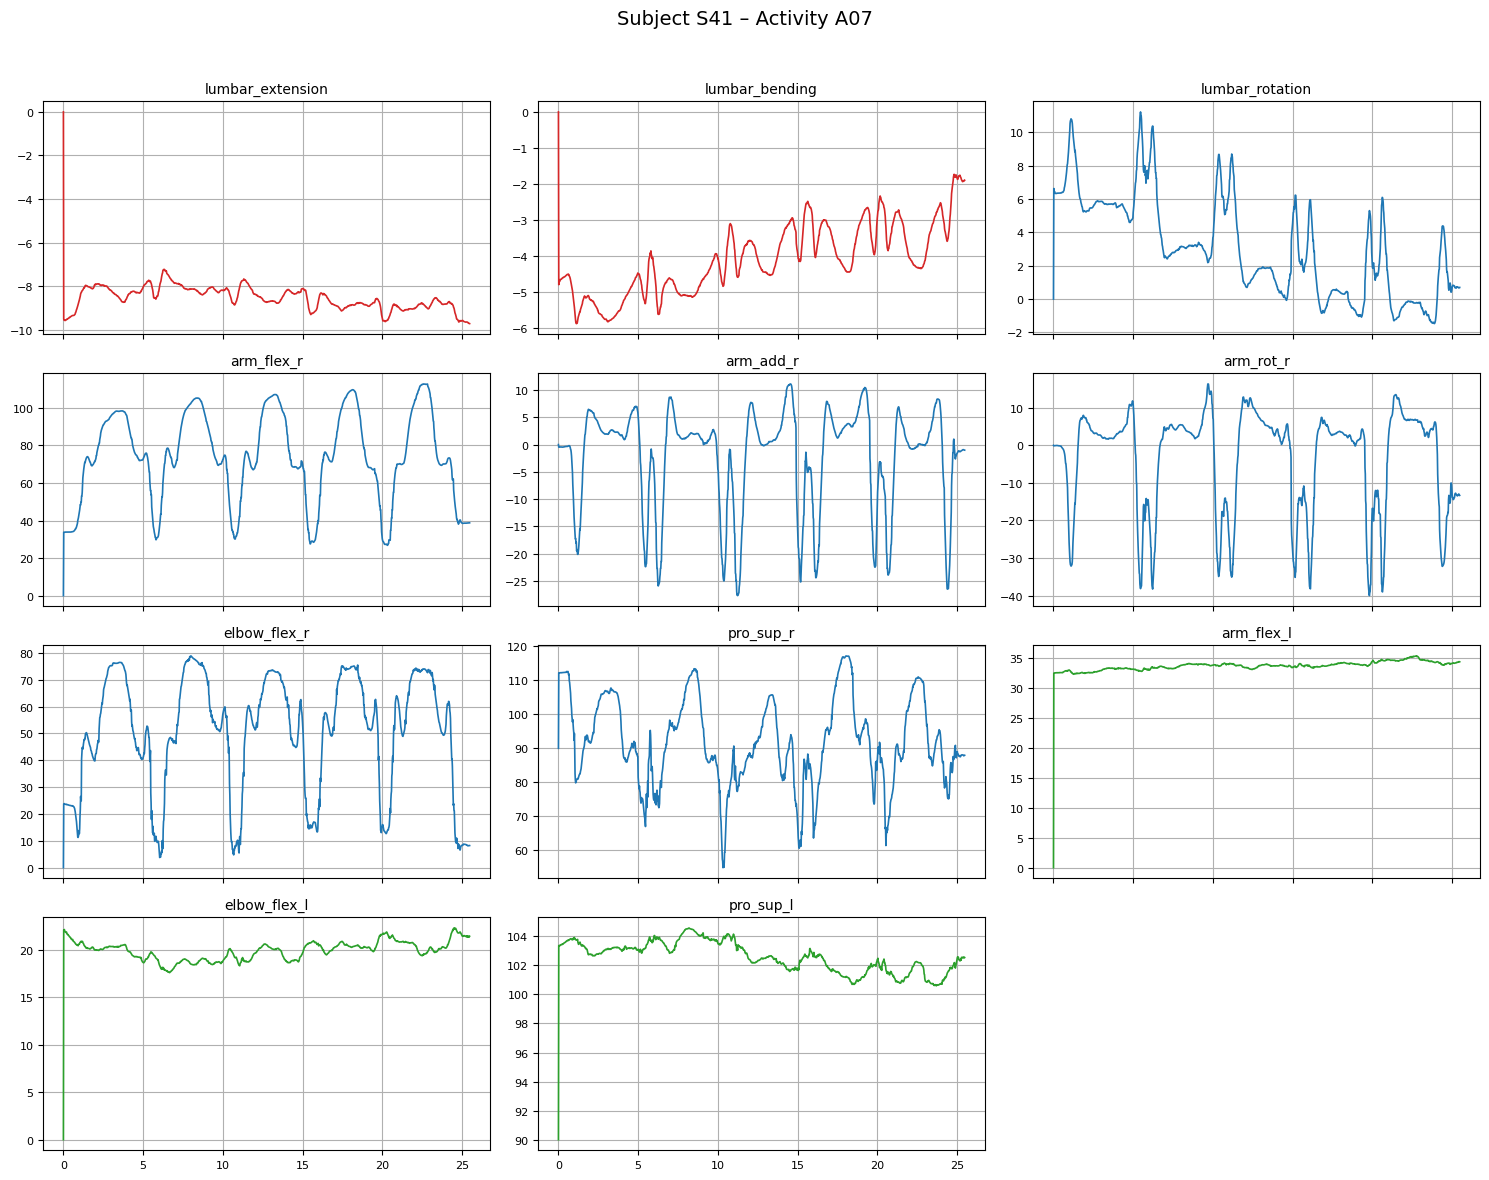

Activity: A13 – File: ik_S41_A13_T02.mot


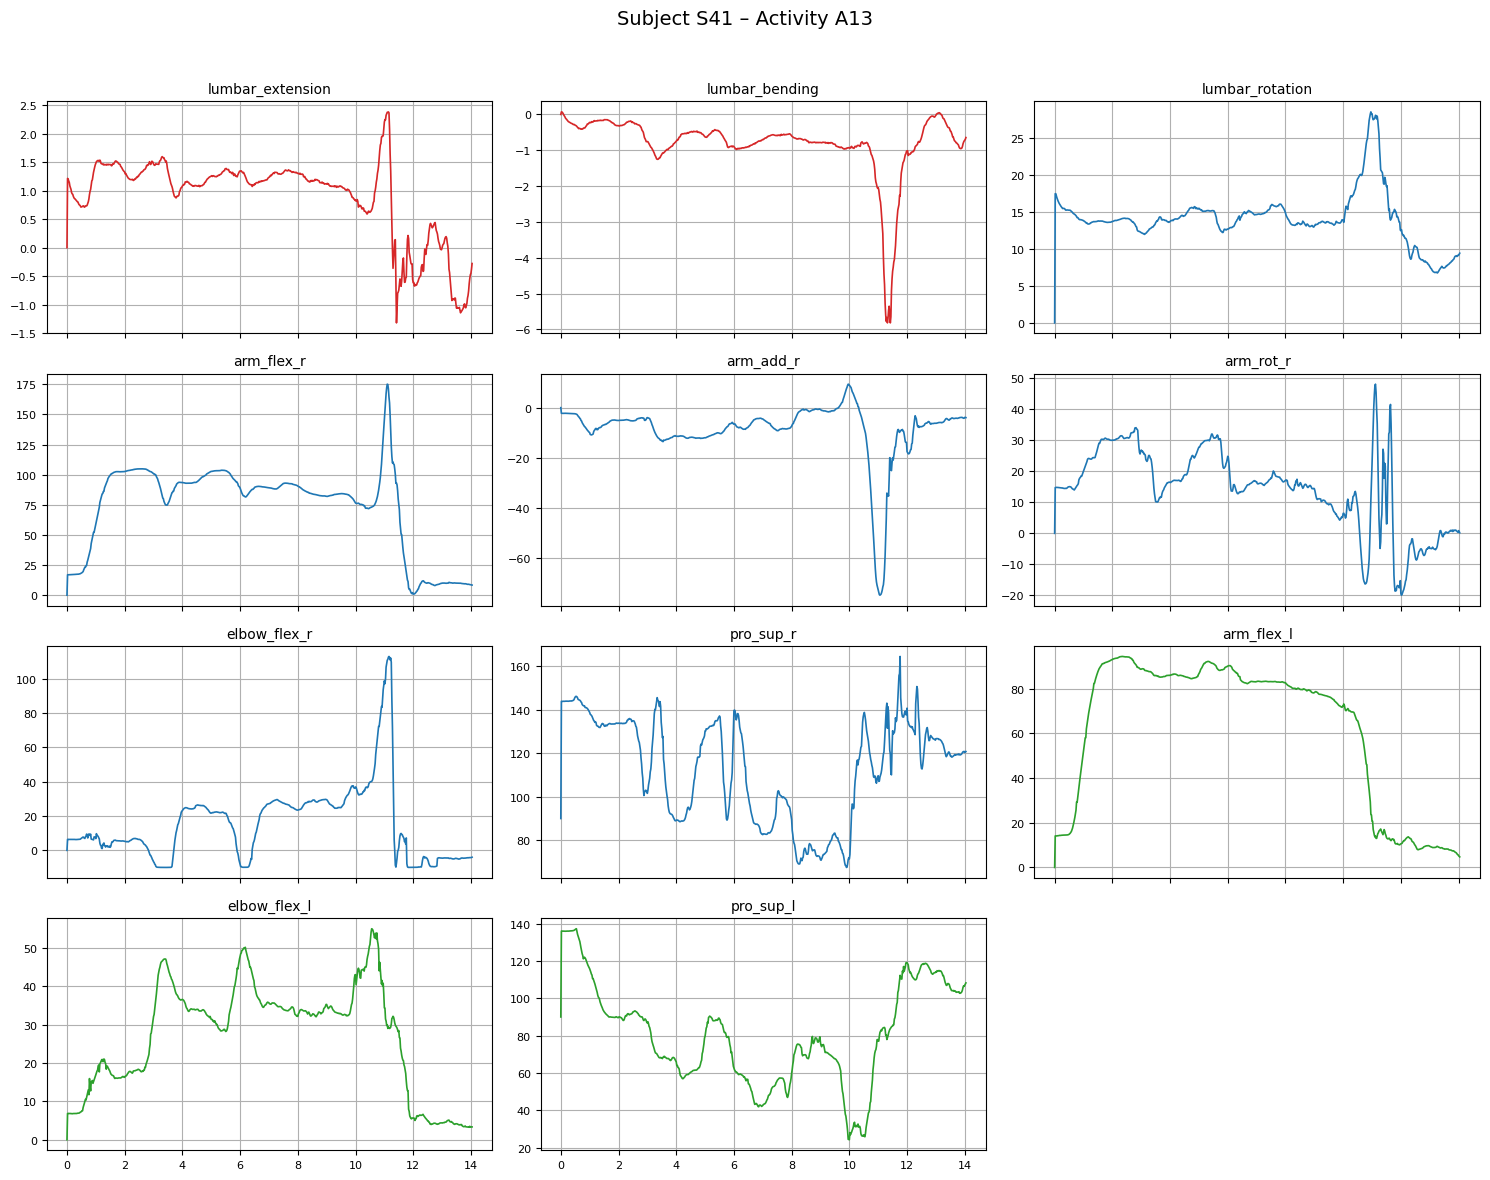

In [8]:
# === Plotting Joint Angle Signals from .mot Files ===

# ---- CONFIGURATION ----
subject = "S41"  # Subject ID to analyse
activities = ["A01", "A03", "A07", "A13"]  # Selected activities to process

# Path to .mot files for the subject
mot_path = r"D:\Machine Learning\Video_IMU data\Data\dataset\videoandimus"
mot_folder = os.path.join(mot_path, subject)

# Output directory for saving plots
output_folder = "exported_joint_plots"
os.makedirs(output_folder, exist_ok=True)

# ---- PROCESS EACH ACTIVITY ----
for activity in activities:
    # Choose the relevant list of joint signals based on activity type
    if activity in lower_activities:
        motsignals = lowerbody_motsignals
    elif activity in upper_activities:
        motsignals = upperbody_motsignals
    else:
        continue  # Skip unknown activities

    # Locate the corresponding .mot file for the subject and activity
    mot_files = [
        f for f in os.listdir(mot_folder)
        if f.startswith(f"ik_{subject}_{activity}") and f.endswith(".mot")
    ]
    if not mot_files:
        print(f"No .mot file found for {activity}")
        continue

    filepath = os.path.join(mot_folder, mot_files[0])
    print(f"Activity: {activity} – File: {mot_files[0]}")

    # ---- LOAD AND PARSE .mot FILE ----
    # Read lines and skip header section
    with open(filepath, 'r') as file:
        lines = file.readlines()
    for i, line in enumerate(lines):
        if 'endheader' in line:
            data_start = i + 1
            break

    # Load the remaining lines as a DataFrame
    df = pd.read_csv(StringIO(''.join(lines[data_start:])), sep='\t', engine='python')
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]  # Remove unnamed columns

    # Filter only columns that exist in the current file
    valid_cols = [col for col in motsignals if col in df.columns]

    # ---- PLOTTING ----
    # Define subplot grid dimensions
    cols_per_row = 3
    n_rows = math.ceil(len(valid_cols) / cols_per_row)
    fig, axs = plt.subplots(n_rows, cols_per_row, figsize=(15, 3 * n_rows), sharex=True)
    axs = axs.flatten()  # Flatten for easy indexing

    # Plot each valid joint angle over time
    for i, col in enumerate(valid_cols):
        color = (
            'tab:blue' if '_r' in col else
            'tab:green' if '_l' in col else
            'tab:red'
        )
        axs[i].plot(df['time'], df[col], color=color, linewidth=1.2)
        axs[i].set_title(col, fontsize=10)
        axs[i].tick_params(axis='both', labelsize=8)
        axs[i].grid(True)

    # Remove any unused subplots
    for j in range(len(valid_cols), len(axs)):
        fig.delaxes(axs[j])

    # Finalise and save the figure
    fig.suptitle(f"Subject {subject} – Activity {activity}", fontsize=14)
    fig.tight_layout(rect=[0, 0, 1, 0.96])
    save_path = os.path.join(output_folder, f"{subject}_{activity}_joint_angles.png")
    plt.savefig(save_path, dpi=300)
    plt.show()


Activity: A01


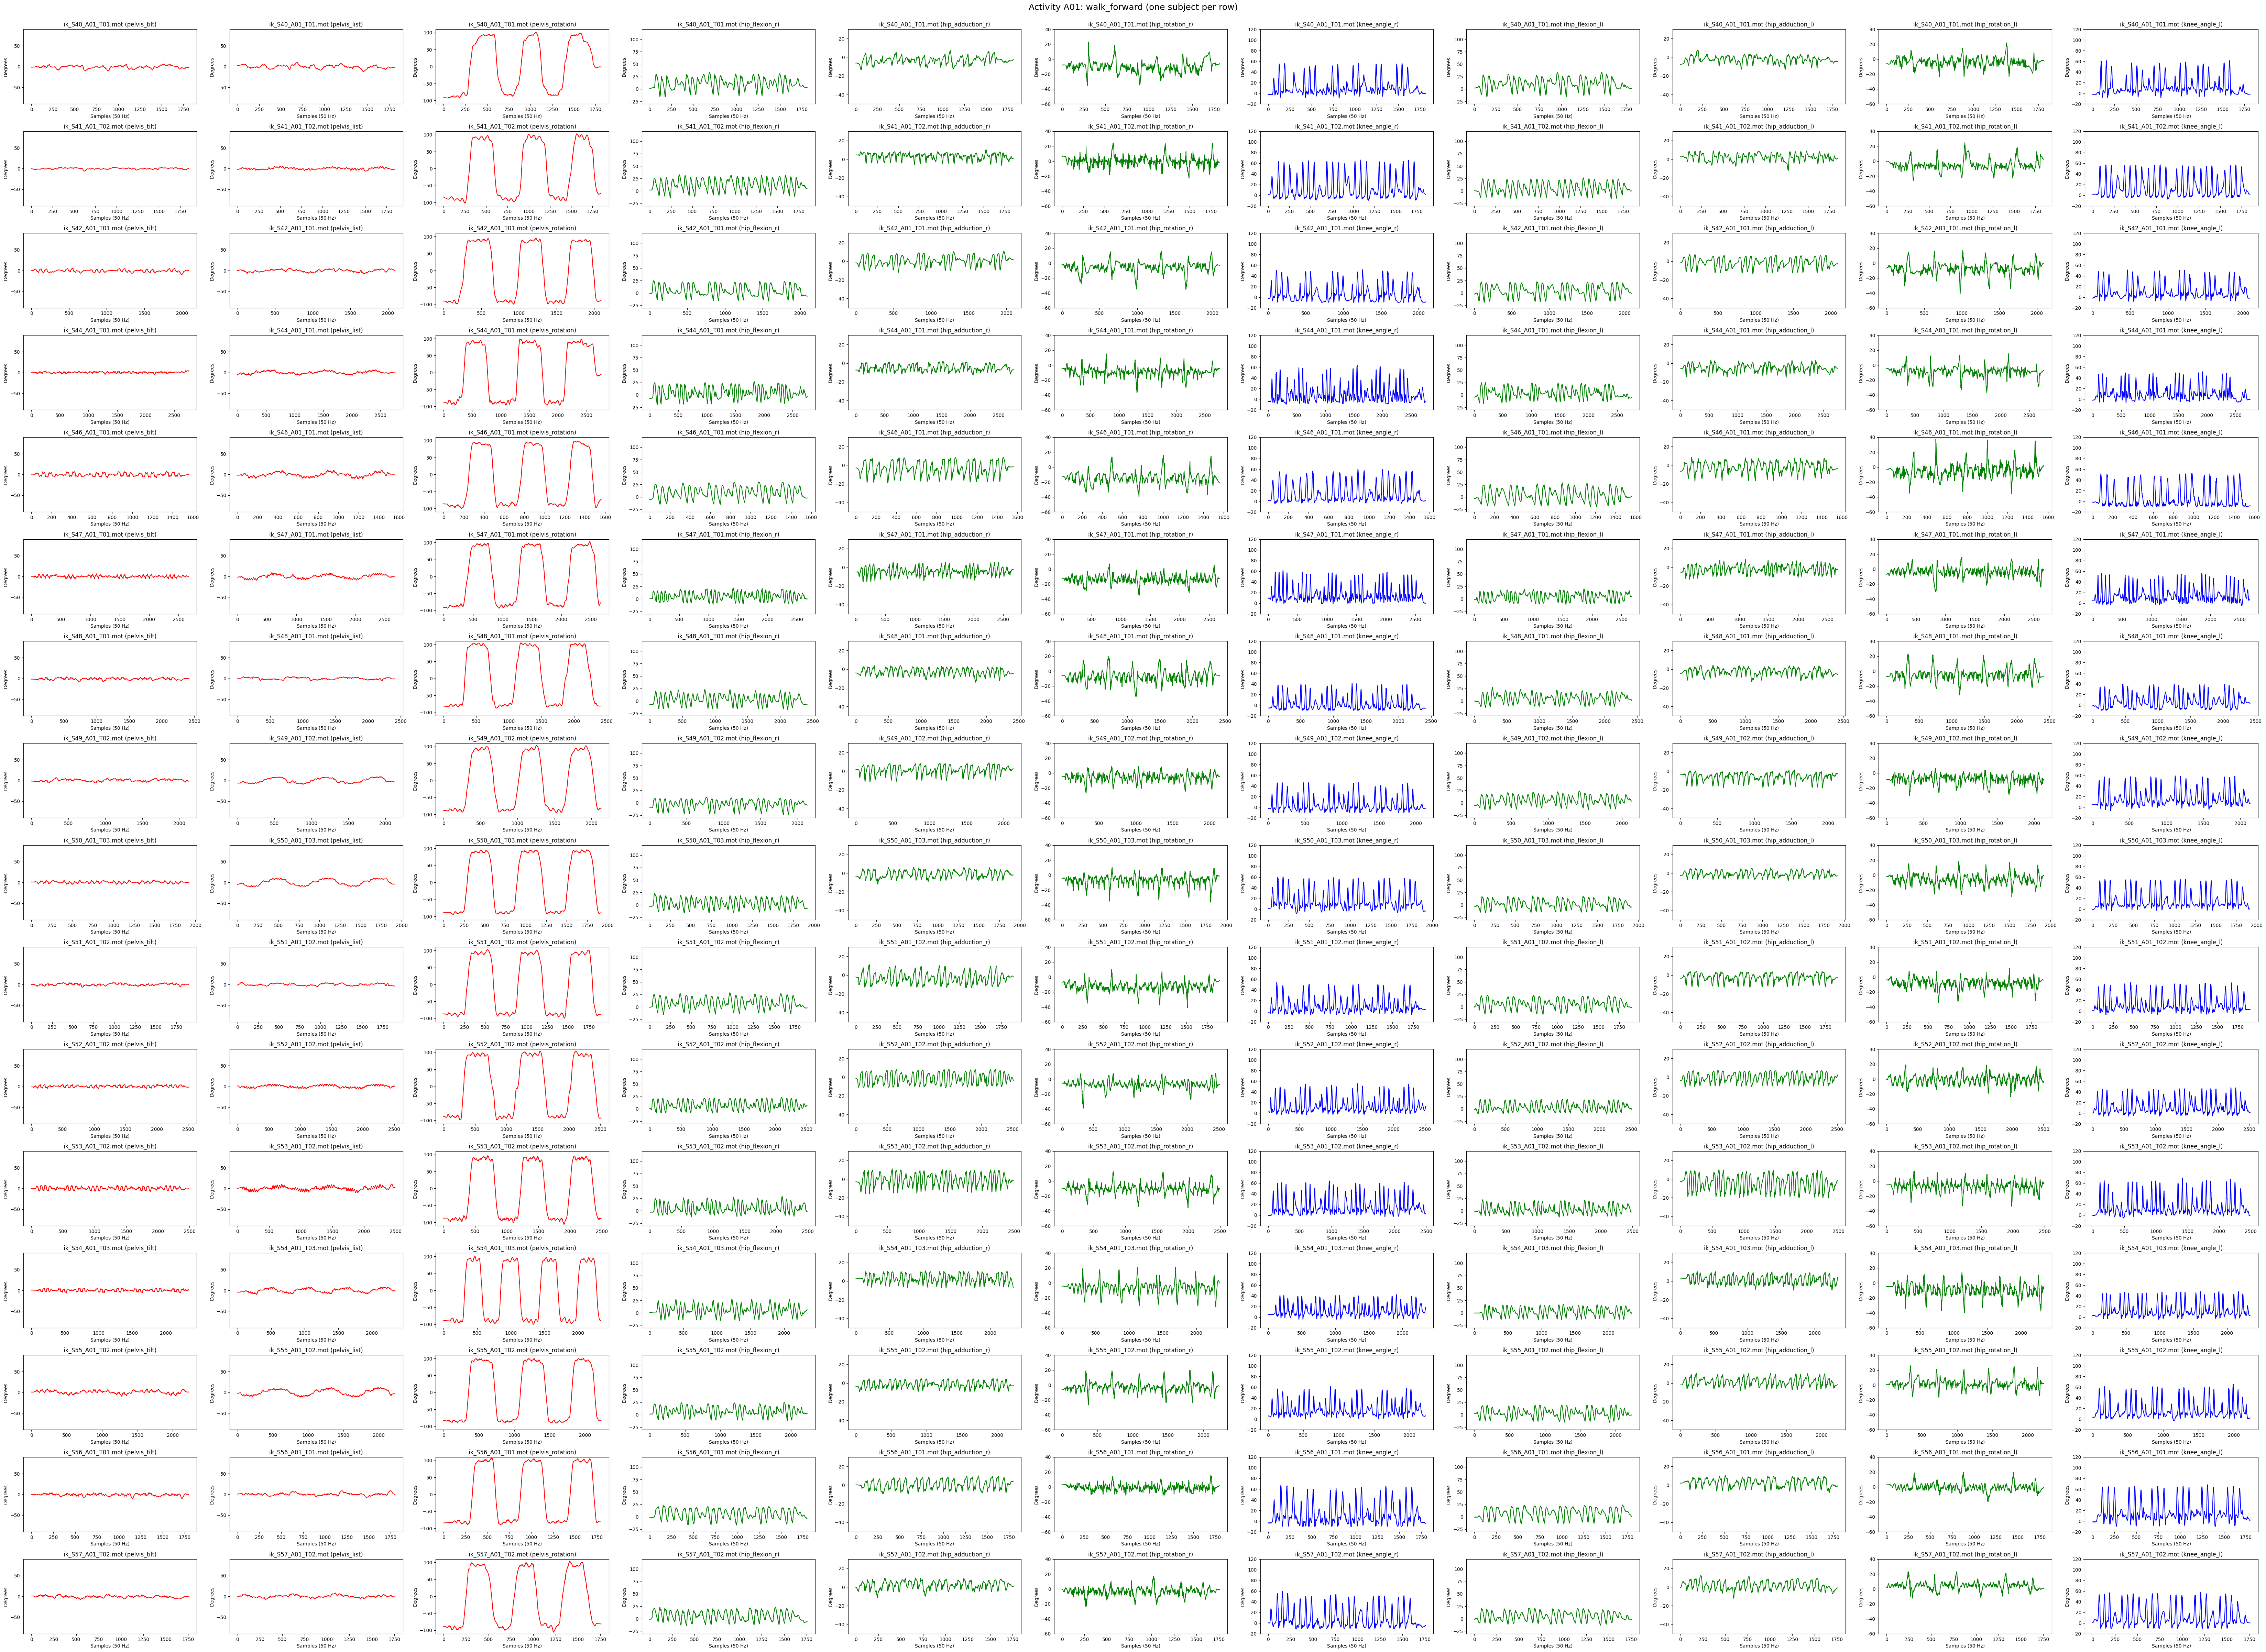

Activity: A02


In [ ]:
# === Batch Plotting of Joint Angles for All Activities and Subjects ===

# Loop through all dataset activities and their corresponding human-readable labels
for activity, legend in zip(dataset_activities, activities_legend):

    # Select appropriate joint angle signals and range settings
    if activity in lower_activities:
        motsignals = lowerbody_motsignals
        motrange = lowerbody_motsignals_range
    elif activity in upper_activities:
        motsignals = upperbody_motsignals
        motrange = upperbody_motsignals_range

    print("Activity: " + activity)

    # Plot and save joint angle graphs for all subjects for the given activity
    plotMotJointAnglesPerActivity(inpath,outpath,subjects,activity,legend,motsignals,motrange,"IMUsJointAngles_"+activity+"_"+legend)

